Hints, requirements, and considerations:

* Your bot should scan your account every **five minutes** for mentions.
* Your bot should pull 500 most recent tweets to analyze for each incoming request.
* Your script should prevent abuse by analyzing **only** Twitter accounts that have not previously been analyzed.
* Your plot should include meaningful legend and labels.
* It should also mention the Twitter account name of the requesting user.
* When submitting your assignment, be sure to have at least **three** analyses tweeted out from your account (enlist the help of classmates, friends, or family, if necessary!).
* Notable libraries used to complete this application include: Matplotlib, Pandas, Tweepy, and VADER.
* You may find it helpful to organize your code in function(s), then call them.
* If you're not yet familiar with creating functions in Python, here is a tutorial you may wish to consult: <https://www.tutorialspoint.com/python/python_functions.htm>.

In [112]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter Api Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [175]:
# Define Tweet Analyzer Function Using VADER

def Tweetalyzer(target_user, num_pages):
    '''Takes a target user's twitter handle and the number of pages you want to analyze (there are 20 tweets per page).
    The function uses Vader to run a sentiment analysis on their latest 20*num_pages tweets. 
    It returns a pandas Dataframe containing the compound sentiment analysis of each tweet'''
    
    # Define lists to hold sentiments
    tweet_polarity = []
    tweets_ago = []
    
    # Set tweet number to 0
    tweet_number = 0
    
    for x in range(1, num_pages+1):
        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, page=x)
        
        # Loop through all public Tweets
        for tweet in public_tweets:
            
            tweet_text = tweet['text']
            results = analyzer.polarity_scores(tweet_text)
            
            # Append results to list
            tweet_polarity.append(results['compound'])
            tweets_ago.append(tweet_number)
            
            # Move tweet number back in time
            tweet_number -= 1
            
    # Define dictionary of the tweet polarities
    polarity_dict = {'Tweet Polarity':tweet_polarity,
                     'Tweets Ago':tweets_ago}
                
    # Return a pandas dataframe of this dictionary         
    return(pd.DataFrame(polarity_dict))

In [176]:
# Test code on his Tremendousness, King Donald
test_user = '@realdonaldtrump'
test_tweet_polarity = Tweetalyzer(test_user, 3)

# Should be 60 tweets for 3 pages
print(len(test_tweet_polarity))

60


In [221]:
# Dictionary containing the kwargs for the plot
graph_format = {'marker':'o', 
                'grid':True,
                'ylim':(-1,1), 
                'alpha':0.6,
                'c':'navy',
                'legend':False,
                'figsize':(10,5)}

# Define a function for plotting the tweet polarity
def PolarityPlotter(polarity_df, user, graph_kwargs):
    '''This function accepts a dataframe containing a the polarity of user's tweets, the name of the user, and the kwargs for the plot.
    It formats the plot and saves it as tweet_analysis.png'''
    ax = polarity_df.plot(x="Tweets Ago", y="Tweet Polarity", **graph_kwargs)
    ax.set_ylabel('Tweet Polarity')
    ax.set_xlabel('Tweets Ago')
    ax.set_title(f'Tweet Sentiment Analysis for {user}')
    ax.set_fc("whitesmoke")
    ax.axhline(color='k')
    ax.annotate('Newest Tweet',
                (polarity_df['Tweets Ago'][0]+0.05, polarity_df['Tweet Polarity'][0]+0.05))
    ax.annotate('Oldest Tweet',
                (polarity_df['Tweets Ago'].iloc[-1], polarity_df['Tweet Polarity'].iloc[-1]+0.05))
    ax.figure.savefig('Images/tweet_analysis.png')

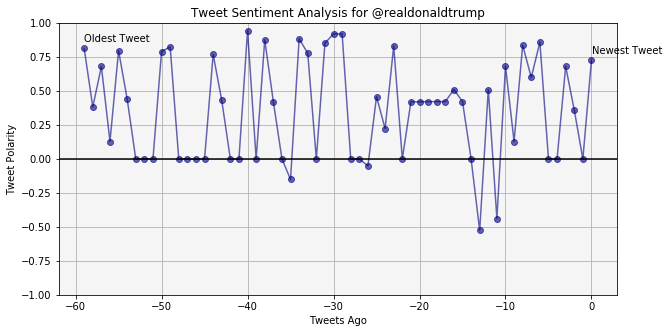

In [222]:
# Make graph for the test user
PolarityPlotter(test_tweet_polarity, test_user, graph_format)

In [223]:
# api.update_with_media('Images/tweet_analysis.png', "This is a test # 2")

@hodor7777
@realdonaldtrump


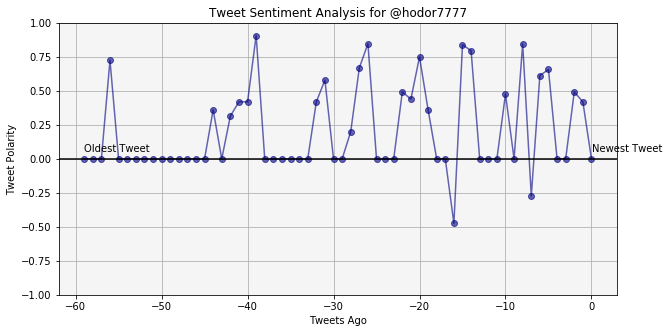

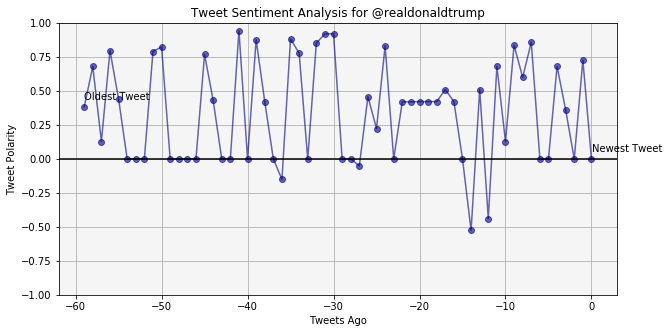

In [224]:
my_handle = '@AlexSta05337262'

# Make empty list to hold the names of accounts we've already checked
analyzed_accts = []

# Use while(True) and sleep function to continuously search for mentions. Don't do this yet, though. Test if code works first.
analysis_reqs = api.search(f'{my_handle} analyze', result_type='recent', count=10)

if len(analysis_reqs) == 0:
    print(f"No new tweets to analyze")
    
else:
    for req in analysis_reqs['statuses']:
        # Remove whitespaces and ':', since people might not be consistent when they ask for analysis. Twitter handles must be alpha numeric, so this won't mess up the acquisition
        req_text = req['text'].replace(" ", "")
        req_text_clean = req_text.replace(":", "").lower()
        # Acquire analysis target handle
        analysis_target = req_text_clean.split('analyze',1)[-1]
        print(analysis_target)
        sentiments = Tweetalyzer(analysis_target,3)
        PolarityPlotter(sentiments, analysis_target, graph_format)